#Data

In [1]:
import requests
import pandas as pd

In [3]:
df=pd.read_csv('/content/digikala_sentiment.csv')

In [ ]:
# df[(df['Suggestion']==3)& (df['Score']>70)]
# df[(df['Suggestion']==2)]


,Text,Score,Suggestion
32,موبایل بسیار خوبی است,100,2
48,بعد از دو سال گوشیم کند شد و ریست می شد مرتب...,96,2
60,من دو سال بود داشتم از چی پی اس راضی نبودم اما...,48,2
85,من برای کارای دانشجویی و سبک گرفتم کیفیت ساخت ...,84,2
91,تبلت من بعد از سه روز بلا استفاده بودن دیگر رو...,60,2
...,...,...,...
3238,جنسش عالی و با کیفیته حیف ک طرحش زیاد قشنگ نیس...,80,2
3245,این مدل تحت لیسانس فرانسه در چین تولید شده,68,2
3248,کلمه Tefal برگرفته از ترکیب دو کلمه Teflon و ...,100,2
3249,من این کالا رو حدود دو هفته هست که خریدم البت...,64,2


#EDA


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        3261 non-null   object
 1   Score       3261 non-null   int64 
 2   Suggestion  3261 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.6+ KB


,Score,Suggestion
count,3261.000000,3261.00000
mean,74.719411,1.41061
std,21.514015,0.72408
min,0.000000,1.00000
25%,60.000000,1.00000
50%,80.000000,1.00000
75%,92.000000,2.00000
max,100.000000,3.00000


In [5]:
df.isnull().sum()


,0
Text,0
Score,0
Suggestion,0


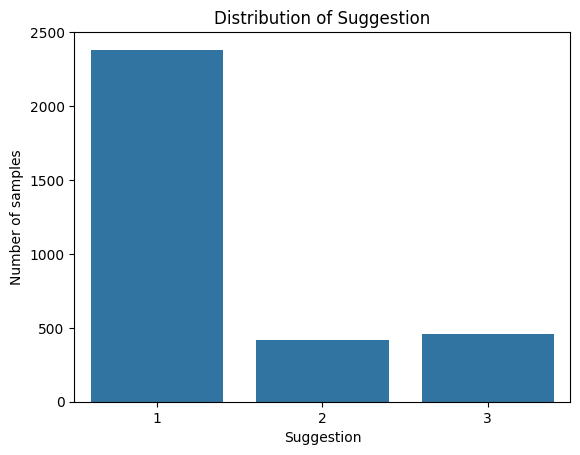

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Suggestion', data=df)
plt.title('Distribution of Suggestion')
plt.xlabel('Suggestion')
plt.ylabel('Number of samples')
plt.show()

##Datapreprocessing

In [8]:
!pip install hazm


In [10]:
from hazm import Normalizer, word_tokenize, stopwords_list, Stemmer, Lemmatizer
import re
Normalizer_object = Normalizer()
word_tokenize_object=word_tokenize
stopwords = stopwords_list()

# def CleanText(text):
#   text=Normalizer_object.normalize(text)
#   text=word_tokenize_object(text)
#   text=' '.join([word for word in text if word not in stopwords])
#   return text

stemmer = Stemmer()
lemmatizer = Lemmatizer()
def clean_text_rich(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = Normalizer_object.normalize(text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if len(w) > 2]
    return " ".join(tokens)

In [14]:
len(stopwords)

389

In [15]:
df["cleanedText"]=df["Text"].apply(clean_text_rich);
df

,Text,Score,Suggestion,cleanedText
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1,این اولین تجربه برای خرید ایفون هست امروز دستم...
1,خرید این محصول رو توصیه میکنم,84,1,خرید این محصول توصیه کرد#کن
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1,ساله این گوشید#گوش داشت#دار هیچ نقطه ضعفی ازش ...
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1,سلام خدمت دوستان این گوشید#گوش همه نظر عالی کی...
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1,سلام دوستانی نگران شکستن صفحه نمایش #هست این ب...
...,...,...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2,کیف ساخت خوبه تنوع خوبه فقط مشکل اینه پیچ‌گوشت...
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1,خیلی خوب درد بخوره انداز عالیه
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1,عالیه خیلی دوس داشت#دار قیمت زیاده ولی نظر ارز...
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1,این مینی فرز دیحیکالا سفارش داد#ده دستم رسید ف...


In [ ]:
# def label_sentimate(score):
#   if score<40:
#     return -1
#   elif score>60:
#     return 1
#   else:
#     return 0

# df["Sentimate"]=df.Score.apply(label_sentimate)
# df.head()

,Text,Score,Suggestion,cleanedText,Sentimate
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1,تجربه خرید ایفون هست امروز ب دستم رسیده اسم طل...,1
1,خرید این محصول رو توصیه میکنم,84,1,خرید محصول توصیه,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1,۱ گوشی دارم نقطه ضعفی ازش ندیدم,0
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1,سلام خدمت دوستان گوشی کیفیت ساخت سرعت کیفیت صد...,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1,سلام دوستانی نگران شکستن صفحه نمایش بدونند صفح...,1


In [16]:
data=df.copy()
# data=data.drop(["Text","Score","Sentimate"],axis=1)

In [ ]:
data['Suggestion'].value_counts()

,count
Suggestion,
1,2382
3,460
2,419


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(ngram_range=(1,2), max_features=3000,max_df=0.85, min_df=5)
vectorized_Text=vectorizer.fit_transform(data['cleanedText'])

In [ ]:
vectorized_Text.toarray()[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
vectorized_Text.data

array([0.10043879, 0.27262967, 0.2834975 , ..., 0.25187333, 0.30610429,
       0.29191767])

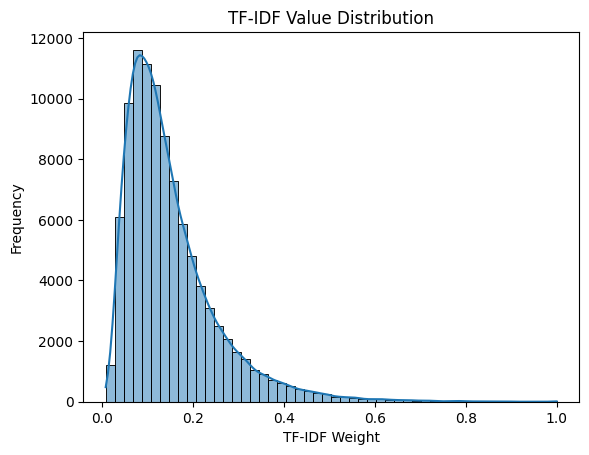

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# نمایش توزیع مقادیر TF-IDF
sns.histplot(vectorized_Text.data, bins=50, kde=True)
plt.title("TF-IDF Value Distribution")
plt.xlabel("TF-IDF Weight")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import numpy as np

mean_tfidf = vectorized_Text.mean(axis=0).A1  # میانگین وزن هر کلمه
top_idx = np.argsort(mean_tfidf)[::-1][:20]

for i in top_idx:
    print(f"{feature_names[i]}: {mean_tfidf[i]:.4f}")

کن: 0.0427
کرد کن: 0.0422
کرد: 0.0422
این: 0.0396
خیلی: 0.0359
خرید: 0.0321
هست: 0.0286
کیفیت: 0.0268
است: 0.0267
داره: 0.0251
عالیه: 0.0248
خر: 0.0242
خرید خر: 0.0242
برای: 0.0237
عالی: 0.0229
داشت: 0.0226
قیمت: 0.0216
ولی: 0.0214
دار: 0.0212
داشت دار: 0.0208


##Train Test

In [18]:
from sklearn.model_selection import train_test_split

X=vectorized_Text
y=data['Suggestion']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X, y)


In [ ]:
y_test.value_counts(normalize=True)

,proportion
Suggestion,
1,0.730475
3,0.140888
2,0.128637


#Model

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Mn=MultinomialNB()
# Mn.fit(X_train,y_train)

# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression(class_weight='balanced')

from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(X_train,y_train)

SVC(kernel='linear')

In [21]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X_train, y_train, cv=5))

[0.82937063 0.88663401 0.88453464 0.90202939 0.90972708]


In [22]:
y_pred=model.predict(X_test)

##Score

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# گزارش ارزیابی مدل
print(classification_report(y_test, y_pred))

# ماتریس آشوب
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96       477
           2       0.75      0.99      0.85        84
           3       0.88      0.99      0.93        92

    accuracy                           0.94       653
   macro avg       0.88      0.97      0.91       653
weighted avg       0.95      0.94      0.94       653

[[438  27  12]
 [  1  83   0]
 [  0   1  91]]
Accuracy: 0.9372128637059725


In [ ]:
text=["  خوب بود .من از خرید این گوشی راضی هستم"]
x=vectorizer.transform(text)
model.predict(x)

array([1])

##


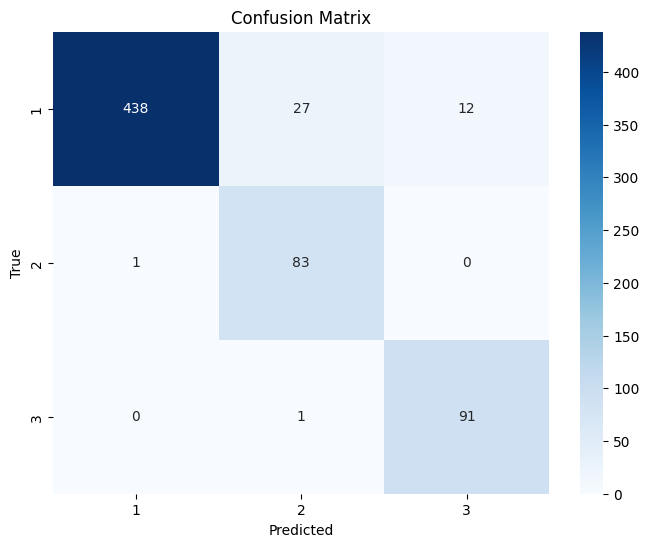

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# حساب کردن confusion matrix
cm = confusion_matrix(y_test, y_pred)

# رسم confusion matrix با استفاده از seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


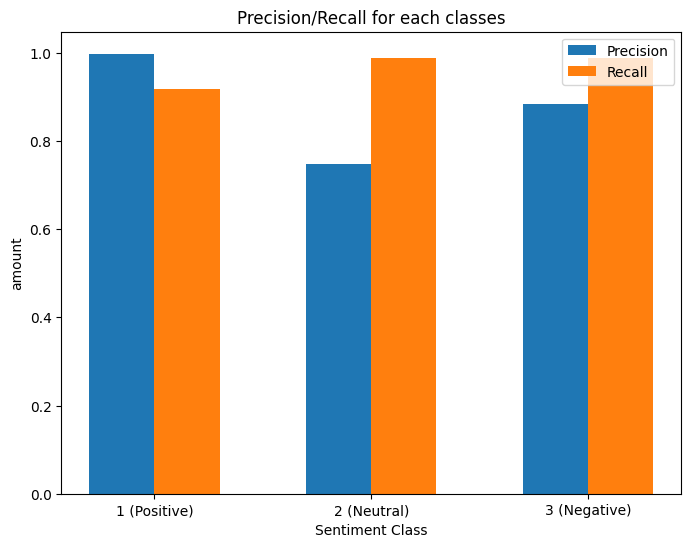

In [32]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# حساب کردن precision و recall برای هر کلاس
precision = [precision_score(y_test, y_pred, average=None, labels=[1])[0],
             precision_score(y_test, y_pred, average=None, labels=[2])[0],
             precision_score(y_test, y_pred, average=None, labels=[3])[0]]

recall = [recall_score(y_test, y_pred, average=None, labels=[1])[0],
          recall_score(y_test, y_pred, average=None, labels=[2])[0],
          recall_score(y_test, y_pred, average=None, labels=[3])[0]]

# رسم نمودار
labels = ['1 (Positive)', '2 (Neutral)', '3 (Negative)']
x = range(3)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.3

# رسم precision و recall
ax.bar(x, precision, bar_width, label='Precision')
ax.bar([p + bar_width for p in x], recall, bar_width, label='Recall')

ax.set_xlabel('Sentiment Class')
ax.set_ylabel('amount')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.title('Precision/Recall for each classes')
plt.show()


#